<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/Practice_Exercise_Inferential_Statistics_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing necessary libraries**

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

# **Binomial Distribution**

### **1) A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.  Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light  bulbs is selected. Find the probability distribution for the defective bulbs and answer the below asked questions.**

**a) What is the probability that none of the LED bulbs are defective?**

In [6]:
# import the required function
from scipy.stats import binom

k = np.arange(0,11)
n = 10
p = 0.05

# use the binom.pmf() function to generate the probability distribution
binomial = stats.binom.pmf(k=k, n=n, p=p)
binomial

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789062e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14])

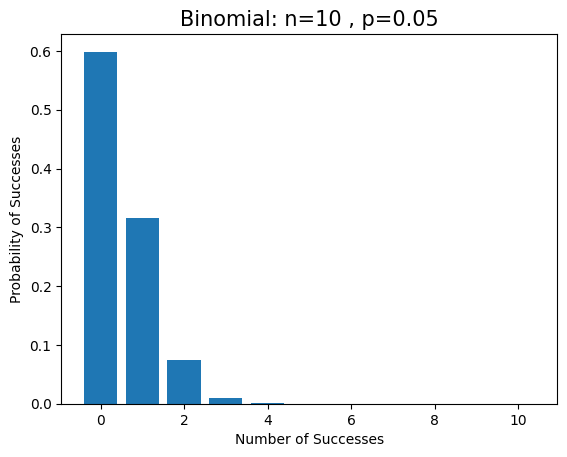

In [7]:
# plot the distribution
plt.bar(k,binomial)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
plt.show()

**b) What is the probability that exactly one of the LED bulbs is defective?**

In [8]:
print('The probability that none of the LED bulbs are defective is %1.4f' %binomial[0])

The probability that none of the LED bulbs are defective is 0.5987


**c) What is the probability that two or fewer of the LED bulbs are defective?**

Hint:
We need to calculate cumulative probability of two or fewer LED bulbs being defective

In [ ]:
print('The probability that none of the LED bulbs are defective is %1.4f' %binomial[0])

**d) What is the probability that three or more of the LED bulbs are defective**

Hint: We need to subtract the cumulative probability up to 2 defective LED bulbs from 1.

In [9]:
# calculate cdf
binom.cdf(k=2, n=n, p=p)

0.9884964426207031

In [12]:
cumulative_binomial = stats.binom.cdf(k,n,p)
cumulative_binomial[2]

0.9884964426207031

### **2) During an NBA game a basketball player has two foul shots (free throw), if he converts 93% of his free throw shots.**

**a) What is the probability that he will convert both the shots?**

In [13]:
success=0.93

In [14]:
print('The probability that he will convert both the shots is',round(stats.binom.pmf(2,2,0.93),4))

The probability that he will convert both the shots is 0.8649


**b) What is the probability that he will convert at least one shot?**

In [16]:
print('The probability that he will convert at least one shot is',round((1 - stats.binom.cdf(0,2,0.93)),4))

The probability that he will convert at least one shot is 0.9951


### **3)	Over a long period  in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory and 5% are considered unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random:**

**a) Two are rated as outstanding**

In [17]:
p=0.1
n=10
k=2
binomial = stats.binom.pmf(k,n,p)
print('Probability of two are rated as outstanding is %1.5f' % binomial )

Probability of two are rated as outstanding is 0.19371


**b) Two or more are rated as outstanding**

In [19]:
#For this we will use cumulative probability
p=0.1
n=10
k=1
##To  answer this we need to calculate cumulative probability
binomial = stats.binom.cdf(k,n,p)
#since we have calculated for 1 or less, for two or more we will subtract this prob from 1
print('Probability of two or more are rated as outstanding is %1.5f' % (1-binomial))

Probability of two or more are rated as outstanding is 0.26390


**c) Eight of the ten are rated either outstanding or excellent**

In [22]:
#prob of excellent & outstanding is 75+10
p=0.85
n=10
k=8
binomial = stats.binom.pmf(k,n,p)
print('Probability of eight out of ten are rated excellent & outstanding is %1.5f' % binomial )

Probability of eight out of ten are rated excellent & outstanding is 0.27590


**d) None of the trainees are rated as unsatisfactory**

In [25]:
p=0.05
n=10
k=0
binomial = stats.binom.pmf(k,n,p)
print('Probability of no trainees are unsatisfactory is %1.5f' % binomial )

Probability of no trainees are unsatisfactory is 0.59874


# **Uniform Distribution**

### **1) A University records the amount of time  students take  to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.**








#### **Reading the Data into the Dataframe**

In [26]:
assign = pd.read_csv('assignment.csv')
assign.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


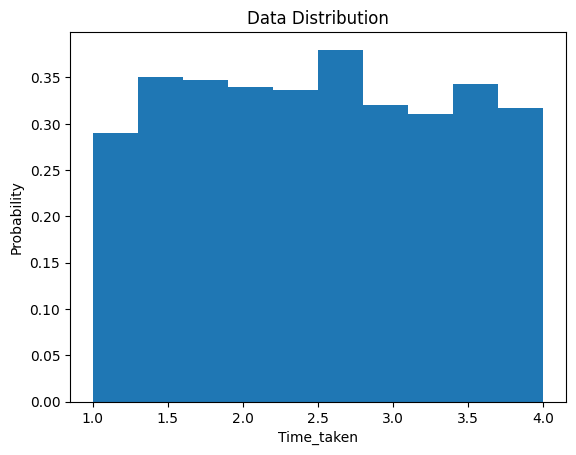

In [30]:
# visualize the distribution of the time needed for bug fixing
plt.hist(assign["Time_taken"], density=True)
plt.xlabel("Time_taken")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

**a) Find the probability that a randomly selected Student  requires atmost 2.5 hours to complete the assignment.**



**CDF:** of a random variable(X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$


In our case, random variable(X) is the number of hours.

$ P(X\leq 2.5)$

In [31]:
# import the required function
from scipy.stats import uniform

# use the uniform.pmf() function to generate the probability distribution
x = np.linspace(1, 4, 50)
probs = uniform.pdf(x, loc=1, scale=3)

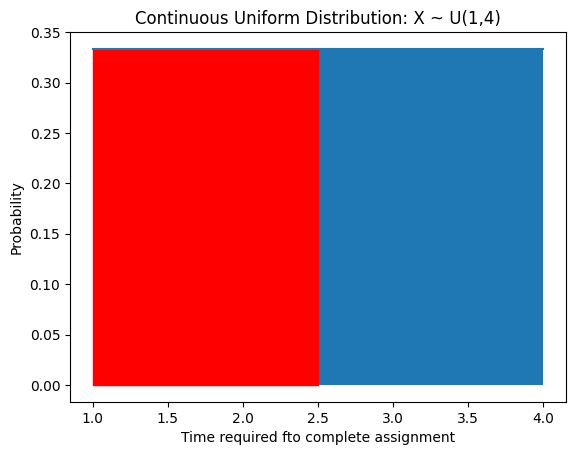

In [35]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(1, 2.5, 50)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=3), color="r")
plt.xlabel("Time required to complete assignment")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,4)")
plt.show()

In [36]:
uniform.cdf(x=2.5, loc=1, scale=3)

0.5

**b) Find the probability that a randomly selected student  requires atleast  3 hours to complete the quiz.**

$ P(X>=3)$

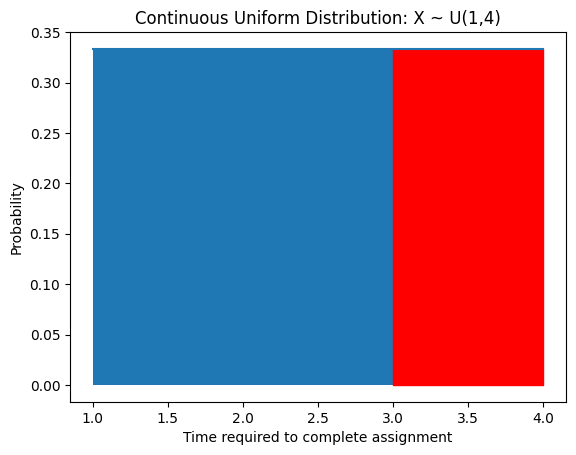

In [39]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(3, 4, 20)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=3), color="r")
plt.xlabel("Time required to complete assignment")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,4)")
plt.show()

In [43]:
round(1 - uniform.cdf(x = 3, loc = 1, scale = 3), 4)

0.3333

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5<= X <=3.5)$

In [44]:
round(uniform.cdf(x = 3.5, loc = 1, scale = 3) - uniform.cdf(x = 1.5, loc = 1, scale = 3), 4)

0.6667

# **Normal Distribution**

### **1) According to the Telecommunication Industry the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. Assuming that the monthly bill follows normal distribution answer the following:**

**a) What is the probability that a randomly selected cell phone bill is more than Rs 1200?**

In [46]:
# import the required function
from scipy.stats import norm

mu = 850
sigma = 150

prob_greater_than_1200 = 1 - norm.cdf(1200, mu, sigma)
print(
    "The probability that a randomly selected cell phone bill is more than Rs 1200",
    round(prob_greater_than_1200, 4),
)

The probability that a randomly selected cell phone bill is more than Rs 1200 0.0098


In [47]:
#To calculate this, we will calculate the cumulative probability for less than 1200 and then will subtract from 1.

round(1-stats.norm.cdf(1200,loc=850,scale=150), 4)

0.0098

**b) What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?**

In [48]:
stats.norm.cdf(1200,loc=850,scale=150) - stats.norm.cdf(750,loc=850,scale=150)

0.7376921338244318

**c) What is the probability that a randomly selected cell phone bill is no more than Rs 650?**

In [49]:
stats.norm.cdf(650,loc=850,scale=150)

0.09121121972586788

**d) What is the amount above which lies top 15% of cell phone bills?**

In [52]:
top_15_percent = norm.ppf(0.85, mu, sigma)
print("The 9 top 15% of cell phone bills should be", round(top_15_percent))

The 9 top 15% of cell phone bills should be 1005


In [53]:
#Let the amount be M. P(X ≥ M) = 15% => 1 – P(X < M) = 0.85 . To calculate this we will use the percent point function i.e ppf.

round(stats.norm.ppf(0.85,loc=850,scale=150), 4)

1005.465

**e) What is the amount below which lies bottom 25% of cell phone bills?**

In [54]:
round(stats.norm.ppf(0.25,loc=850,scale=150), 4)

748.8265

### **2) The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20ml. Assume that it follows a normal distribution and answer the following questions:**

**a) What is the probability that the bottle filled less than 480 ml ?**

In [55]:
stats.norm.cdf(480,loc=500,scale=20)

0.15865525393145707

In [57]:
mu = 500
sigma= 20
x1=480
z1=(x1-mu)/sigma
p=stats.norm.cdf(z1)
print ('Probaility of bottle filled less than 480 ml is %1.4f' %p)

Probaility of bottle filled less than 480 ml is 0.1587


**b) What is the probability that the bottle filled more than  520 ml?**

In [58]:
1 - stats.norm.cdf(520,loc=500,scale=20)

0.15865525393145707

**c) What is the probability that the bottle filled between 470 ml to 525 ml?**

In [59]:
stats.norm.cdf(525,loc=500,scale=20) - stats.norm.cdf(470,loc=500,scale=20)

0.8275430250642866

### **3) In 2 Liter soft drink bottles the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If the bottles contain less than 95% of the listed net content(1.90 liters),  the manufacturer may be subject to penalty by the state office of consumer affairs. Bottles that have a net content above 2.1 liters may cause excess spillage upon opening. Answer the following questions:**

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [60]:
stats.norm.cdf(2.0,loc=2.0,scale=0.05) - stats.norm.cdf(1.9,loc=2.0,scale=0.05)

0.4772498680518209

**b)  What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [66]:
stats.norm.cdf(2.1,loc=2.0,scale=0.05) - stats.norm.cdf(1.9,loc=2.0,scale=0.05)

0.9544997361036418

**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [65]:
stats.norm.cdf(1.9,loc=2.0,scale=0.05) + (1- stats.norm.cdf(2.1,loc=2.0,scale=0.05))

0.045500263896358195

**d) 99% of the bottles atleast have how much soft drink in them?**

In [68]:
round(stats.norm.ppf(0.01,loc=2.0,scale=0.05), 4)

1.8837

# **Sampling Distribution**

### 1) **Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery lives of is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.**

In [69]:

# import the required function
from scipy.stats import norm
# declare the value of mean lifetime of battery in mu
mu = 60
# declare the value of standard deviation of battery in std
sigma = 6
# sample size
n = 40
# find the sample standard deviation
s = sigma/np.sqrt(40)
# find the probability
round(norm.cdf(58, loc = mu, scale = s), 4)

0.0175

# **Interval Estimation**

### **1) A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the March quarter of 2020. The average usage was found to be 310kWh. In a very large study in the March quarter of the previous year it was found that the standard deviation of the usage was 89kWh.**

### **Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating a 95% confidence interval for the mean usage in the March quarter of 2019.**



In [70]:
n = 40
mu = 310
sigma = 89
# import the required function
from scipy.stats import t

# set the values of sample mean and sample standard deviation
x_bar, s = mu,sigma

# set the value of sample size and degrees of freedom
n = n
k = n - 1

# construct the confidence interval
np.round(t.interval(0.95, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2)


array([281.54, 338.46])

In [72]:
#import the required function
from scipy.stats import norm
import numpy as np

#set the values of sample mean and sigma
x_bar, sigma = 310, 89

# set the value of sample size
n = 40-1

# construct the confidence interval
np.round(norm.interval(0.95, loc = x_bar, scale = sigma/np.sqrt(n)), 2)

array([282.07, 337.93])